# Analysis X tweets

In [1]:
import pandas as pd
import sqlalchemy as sa
from sqlalchemy import text
import matplotlib.pyplot as plt

## Read and save the csv files

In [2]:
cr7_path = 'plugins\Cristiano.csv'
davo_path = 'plugins\DavooXeneizeJRR.csv'
elon_path = 'plugins\elonmusk.csv'
fabrizio_path = 'plugins\FabrizioRomano.csv'
cobra_path = 'plugins\lautarodeIcampo.csv'
overlap_path = 'plugins\WeAreTheOverlap.csv'

In [3]:
#Reading CSV files
cr7 = pd.read_csv(cr7_path)
davo = pd.read_csv(davo_path)
elon = pd.read_csv(elon_path)
fabrizio = pd.read_csv(fabrizio_path)
cobra = pd.read_csv(cobra_path)
overlap = pd.read_csv(overlap_path)

#Creating Dataframes
df_cr7 = pd.DataFrame(cr7)
df_davo = pd.DataFrame(davo)
df_elon = pd.DataFrame(elon)
df_fabrizio = pd.DataFrame(fabrizio)
df_cobra = pd.DataFrame(cobra)
df_overlap = pd.DataFrame(overlap)

## Start working with each dataframe

### CR7 Dataframe

In [4]:
cr7.head(10)

,user,text,time,language,source,retweet_count,reply_count,like_count,quote_count
0,155659213,This chapter is over.\nThe story? Still being ...,2025-05-26 20:34:35+00:00,en,NaN,78763,36190,1261388,14762
1,155659213,Living your best life is all about simplicity....,2025-05-24 13:00:02+00:00,en,NaN,18860,6970,268009,1053
2,155659213,One of those nights where the ball just didn’t...,2025-05-21 18:46:48+00:00,en,NaN,38747,12911,638130,1884
3,155659213,You think you know what age I am?\nThink again...,2025-05-20 16:05:48+00:00,en,NaN,17906,6115,174681,325
4,155659213,Have you heard the news? @UFLgame got a big up...,2025-05-15 10:07:46+00:00,en,NaN,13261,8309,162823,352
5,155659213,"Parabéns pela estreia por @selecaoportugal, fi...",2025-05-13 13:44:41+00:00,pt,NaN,33434,6389,498111,1095
6,155659213,Let’s go! 🔥 https://t.co/sJjfti40dj,2025-05-12 17:04:36+00:00,en,NaN,16613,6136,239227,408
7,155659213,What I do today can give me more tomorrows. Wi...,2025-05-10 13:11:01+00:00,en,NaN,14657,5662,174493,284


In [5]:
df_cr7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user           8 non-null      int64  
 1   text           8 non-null      object 
 2   time           8 non-null      object 
 3   language       8 non-null      object 
 4   source         0 non-null      float64
 5   retweet_count  8 non-null      int64  
 6   reply_count    8 non-null      int64  
 7   like_count     8 non-null      int64  
 8   quote_count    8 non-null      int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 704.0+ bytes


* Observations
    - We need to change the column name of time to avoid future conflicts
    - We need to change the dtype object to datetime of time column.
    - We need to drop the source column.

* Objetive:
    - Create two new columns in all the tables
        - date column
        - time column 

Change name of time column

In [6]:
df_cr7.rename(columns= {'time' : 'datetime'}, inplace= True)

Change the Dtype of the time column 

In [7]:
df_cr7['datetime'] = pd.to_datetime(df_cr7['datetime'])
df_cr7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user           8 non-null      int64              
 1   text           8 non-null      object             
 2   datetime       8 non-null      datetime64[ns, UTC]
 3   language       8 non-null      object             
 4   source         0 non-null      float64            
 5   retweet_count  8 non-null      int64              
 6   reply_count    8 non-null      int64              
 7   like_count     8 non-null      int64              
 8   quote_count    8 non-null      int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(2)
memory usage: 704.0+ bytes


Drop source column

In [8]:
df_cr7.drop(columns='source', inplace=True)

Create two new columns (date, time)

In [9]:
df_cr7['date'] = df_cr7['datetime'].dt.date
df_cr7['time'] = df_cr7['datetime'].dt.time
df_cr7.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,155659213,This chapter is over.\nThe story? Still being ...,2025-05-26 20:34:35+00:00,en,78763,36190,1261388,14762,2025-05-26,20:34:35
1,155659213,Living your best life is all about simplicity....,2025-05-24 13:00:02+00:00,en,18860,6970,268009,1053,2025-05-24,13:00:02
2,155659213,One of those nights where the ball just didn’t...,2025-05-21 18:46:48+00:00,en,38747,12911,638130,1884,2025-05-21,18:46:48
3,155659213,You think you know what age I am?\nThink again...,2025-05-20 16:05:48+00:00,en,17906,6115,174681,325,2025-05-20,16:05:48
4,155659213,Have you heard the news? @UFLgame got a big up...,2025-05-15 10:07:46+00:00,en,13261,8309,162823,352,2025-05-15,10:07:46


### Davo Dataframe

In [10]:
df_davo.head()

,user,text,time,language,source,retweet_count,reply_count,like_count,quote_count
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,NaN,2722,2812,87397,376
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,NaN,139,182,9946,6
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,NaN,2252,653,39737,135
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,NaN,3057,346,47741,32
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,NaN,2518,344,51874,66


In [11]:
df_davo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user           10 non-null     int64  
 1   text           10 non-null     object 
 2   time           10 non-null     object 
 3   language       10 non-null     object 
 4   source         0 non-null      float64
 5   retweet_count  10 non-null     int64  
 6   reply_count    10 non-null     int64  
 7   like_count     10 non-null     int64  
 8   quote_count    10 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 848.0+ bytes


* Observations
    - We need to change the column name of time to avoid future conflicts
    - We need to change the dtype object to datetime of time column.
    - We need to drop the source column.

* Objetive:
    - Create two new columns in all the tables
        - date column
        - time column 

Change name of time column

In [12]:
df_davo.rename(columns={'time' : 'datetime'}, inplace=True)
df_davo.columns

Index(['user', 'text', 'datetime', 'language', 'source', 'retweet_count',
       'reply_count', 'like_count', 'quote_count'],
      dtype='object')

Change the Dtype of the time column 

In [13]:
df_davo['datetime'] = pd.to_datetime(df_davo['datetime'])
df_davo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user           10 non-null     int64              
 1   text           10 non-null     object             
 2   datetime       10 non-null     datetime64[ns, UTC]
 3   language       10 non-null     object             
 4   source         0 non-null      float64            
 5   retweet_count  10 non-null     int64              
 6   reply_count    10 non-null     int64              
 7   like_count     10 non-null     int64              
 8   quote_count    10 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(2)
memory usage: 848.0+ bytes


Drop source column

In [14]:
df_davo.drop(columns='source', inplace=True)
df_davo.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66


Create two new columns (date, time)

In [15]:
df_davo['date'] = df_davo['datetime'].dt.date
df_davo['time'] = df_davo['datetime'].dt.time
df_davo.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376,2025-05-21,21:00:11
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6,2025-05-11,19:47:36
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135,2025-05-06,21:44:37
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32,2025-05-06,20:57:33
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66,2025-05-06,20:21:21


### Elon Dataframe

In [16]:
df_elon.head()

,user,text,time,language,source,retweet_count,reply_count,like_count,quote_count
0,44196397,How many real people are still on the Internet...,2025-05-27 06:02:12+00:00,en,NaN,478,1919,3833,84
1,44196397,Kardashev 1 or you’re not even trying,2025-05-27 05:57:28+00:00,en,NaN,513,1190,4992,123
2,44196397,Starship Pez Dispenser \n https://t.co/7yl0h1CXkn,2025-05-27 05:01:25+00:00,en,NaN,1569,1372,16188,117
3,44196397,🥰 💫 https://t.co/KQdCCM32gs,2025-05-27 01:58:57+00:00,art,NaN,1926,2009,14467,121
4,44196397,True https://t.co/UtyoHuynMn,2025-05-26 21:11:28+00:00,en,NaN,7666,2959,50507,153


In [17]:
df_elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user           10 non-null     int64  
 1   text           10 non-null     object 
 2   time           10 non-null     object 
 3   language       10 non-null     object 
 4   source         0 non-null      float64
 5   retweet_count  10 non-null     int64  
 6   reply_count    10 non-null     int64  
 7   like_count     10 non-null     int64  
 8   quote_count    10 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 848.0+ bytes


* Observations
    - We need to change the column name of time to avoid future conflicts
    - We need to change the dtype object to datetime of time column.
    - We need to drop the source column.

* Objetive:
    - Create two new columns in all the tables
        - date column
        - time column 

Change name of time column

In [18]:
df_elon.rename(columns= {'time' : 'datetime'}, inplace=True)
df_elon.head()

,user,text,datetime,language,source,retweet_count,reply_count,like_count,quote_count
0,44196397,How many real people are still on the Internet...,2025-05-27 06:02:12+00:00,en,NaN,478,1919,3833,84
1,44196397,Kardashev 1 or you’re not even trying,2025-05-27 05:57:28+00:00,en,NaN,513,1190,4992,123
2,44196397,Starship Pez Dispenser \n https://t.co/7yl0h1CXkn,2025-05-27 05:01:25+00:00,en,NaN,1569,1372,16188,117
3,44196397,🥰 💫 https://t.co/KQdCCM32gs,2025-05-27 01:58:57+00:00,art,NaN,1926,2009,14467,121
4,44196397,True https://t.co/UtyoHuynMn,2025-05-26 21:11:28+00:00,en,NaN,7666,2959,50507,153


Change the Dtype of the time column 

In [19]:
df_elon['datetime'] = pd.to_datetime(df_elon['datetime'])
df_elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user           10 non-null     int64              
 1   text           10 non-null     object             
 2   datetime       10 non-null     datetime64[ns, UTC]
 3   language       10 non-null     object             
 4   source         0 non-null      float64            
 5   retweet_count  10 non-null     int64              
 6   reply_count    10 non-null     int64              
 7   like_count     10 non-null     int64              
 8   quote_count    10 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(2)
memory usage: 848.0+ bytes


Drop source column

In [20]:
df_elon.drop(columns= 'source', inplace=True)
df_elon.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count
0,44196397,How many real people are still on the Internet...,2025-05-27 06:02:12+00:00,en,478,1919,3833,84
1,44196397,Kardashev 1 or you’re not even trying,2025-05-27 05:57:28+00:00,en,513,1190,4992,123
2,44196397,Starship Pez Dispenser \n https://t.co/7yl0h1CXkn,2025-05-27 05:01:25+00:00,en,1569,1372,16188,117
3,44196397,🥰 💫 https://t.co/KQdCCM32gs,2025-05-27 01:58:57+00:00,art,1926,2009,14467,121
4,44196397,True https://t.co/UtyoHuynMn,2025-05-26 21:11:28+00:00,en,7666,2959,50507,153


Create two new columns (date, time)

In [53]:
df_elon['date'] = df_elon['datetime'].dt.date
df_elon['time'] = df_elon['datetime'].dt.time
df_elon.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,44196397,How many real people are still on the Internet...,2025-05-27 06:02:12+00:00,en,478,1919,3833,84,2025-05-27,06:02:12
1,44196397,Kardashev 1 or you’re not even trying,2025-05-27 05:57:28+00:00,en,513,1190,4992,123,2025-05-27,05:57:28
2,44196397,Starship Pez Dispenser \n https://t.co/7yl0h1CXkn,2025-05-27 05:01:25+00:00,en,1569,1372,16188,117,2025-05-27,05:01:25
3,44196397,🥰 💫 https://t.co/KQdCCM32gs,2025-05-27 01:58:57+00:00,art,1926,2009,14467,121,2025-05-27,01:58:57
4,44196397,True https://t.co/UtyoHuynMn,2025-05-26 21:11:28+00:00,en,7666,2959,50507,153,2025-05-26,21:11:28


### Fabrizio Dataframe

In [387]:
df_fabrizio.head()

,user,text,time,language,source,retweet_count,reply_count,like_count,quote_count
0,330262748,🚨 Maresca: “The problem is that the press thin...,2025-05-16 22:15:45+00:00,en,NaN,573,379,10530,95
1,330262748,🔵🇪🇸 Five Premier League goals for Marc Cucurel...,2025-05-16 22:03:29+00:00,en,NaN,1146,260,16168,71
2,330262748,🔵⚡️ Chelsea never considered Reece James exit ...,2025-05-16 21:49:41+00:00,en,NaN,1757,362,23612,94
3,330262748,🚨📈 Crucial win for Chelsea! https://t.co/Fe26M...,2025-05-16 21:15:45+00:00,en,NaN,2290,582,37712,100
4,330262748,"🚨🇦🇷 Dibu Martínez, emotional at FT as this cou...",2025-05-16 21:02:11+00:00,en,NaN,1011,362,19113,276


In [21]:
df_fabrizio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user           10 non-null     int64  
 1   text           10 non-null     object 
 2   time           10 non-null     object 
 3   language       10 non-null     object 
 4   source         0 non-null      float64
 5   retweet_count  10 non-null     int64  
 6   reply_count    10 non-null     int64  
 7   like_count     10 non-null     int64  
 8   quote_count    10 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 848.0+ bytes


* Observations
    - We need to change the column name of time to avoid future conflicts
    - We need to change the dtype object to datetime of time column.
    - We need to drop the source column.

* Objetive:
    - Create two new columns in all the tables
        - date column
        - time column 

Change name of time column

In [22]:
df_fabrizio.rename(columns={'time' : 'datetime'}, inplace=True)
df_fabrizio.head()

,user,text,datetime,language,source,retweet_count,reply_count,like_count,quote_count
0,330262748,🚨 Maresca: “The problem is that the press thin...,2025-05-16 22:15:45+00:00,en,NaN,573,379,10530,95
1,330262748,🔵🇪🇸 Five Premier League goals for Marc Cucurel...,2025-05-16 22:03:29+00:00,en,NaN,1146,260,16168,71
2,330262748,🔵⚡️ Chelsea never considered Reece James exit ...,2025-05-16 21:49:41+00:00,en,NaN,1757,362,23612,94
3,330262748,🚨📈 Crucial win for Chelsea! https://t.co/Fe26M...,2025-05-16 21:15:45+00:00,en,NaN,2290,582,37712,100
4,330262748,"🚨🇦🇷 Dibu Martínez, emotional at FT as this cou...",2025-05-16 21:02:11+00:00,en,NaN,1011,362,19113,276


Change the Dtype of the time column 

In [23]:
df_fabrizio['datetime'] = pd.to_datetime(df_fabrizio['datetime'])
df_fabrizio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user           10 non-null     int64              
 1   text           10 non-null     object             
 2   datetime       10 non-null     datetime64[ns, UTC]
 3   language       10 non-null     object             
 4   source         0 non-null      float64            
 5   retweet_count  10 non-null     int64              
 6   reply_count    10 non-null     int64              
 7   like_count     10 non-null     int64              
 8   quote_count    10 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(2)
memory usage: 848.0+ bytes


Drop source column

In [24]:
df_fabrizio.drop(columns='source', inplace=True)
df_fabrizio.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count
0,330262748,🚨 Maresca: “The problem is that the press thin...,2025-05-16 22:15:45+00:00,en,573,379,10530,95
1,330262748,🔵🇪🇸 Five Premier League goals for Marc Cucurel...,2025-05-16 22:03:29+00:00,en,1146,260,16168,71
2,330262748,🔵⚡️ Chelsea never considered Reece James exit ...,2025-05-16 21:49:41+00:00,en,1757,362,23612,94
3,330262748,🚨📈 Crucial win for Chelsea! https://t.co/Fe26M...,2025-05-16 21:15:45+00:00,en,2290,582,37712,100
4,330262748,"🚨🇦🇷 Dibu Martínez, emotional at FT as this cou...",2025-05-16 21:02:11+00:00,en,1011,362,19113,276


Create two new columns (date, time)

In [25]:
df_fabrizio['date'] = df_fabrizio['datetime'].dt.date
df_fabrizio['time'] = df_fabrizio['datetime'].dt.time
df_fabrizio.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,330262748,🚨 Maresca: “The problem is that the press thin...,2025-05-16 22:15:45+00:00,en,573,379,10530,95,2025-05-16,22:15:45
1,330262748,🔵🇪🇸 Five Premier League goals for Marc Cucurel...,2025-05-16 22:03:29+00:00,en,1146,260,16168,71,2025-05-16,22:03:29
2,330262748,🔵⚡️ Chelsea never considered Reece James exit ...,2025-05-16 21:49:41+00:00,en,1757,362,23612,94,2025-05-16,21:49:41
3,330262748,🚨📈 Crucial win for Chelsea! https://t.co/Fe26M...,2025-05-16 21:15:45+00:00,en,2290,582,37712,100,2025-05-16,21:15:45
4,330262748,"🚨🇦🇷 Dibu Martínez, emotional at FT as this cou...",2025-05-16 21:02:11+00:00,en,1011,362,19113,276,2025-05-16,21:02:11


### La Cobra Dataframe

In [26]:
df_cobra.head()

,user,text,time,language,source,retweet_count,reply_count,like_count,quote_count
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,NaN,2722,2812,87397,376
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,NaN,139,182,9946,6
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,NaN,2252,653,39737,135
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,NaN,3057,346,47741,32
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,NaN,2518,344,51874,66


In [27]:
df_cobra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user           20 non-null     int64  
 1   text           20 non-null     object 
 2   time           20 non-null     object 
 3   language       20 non-null     object 
 4   source         0 non-null      float64
 5   retweet_count  20 non-null     int64  
 6   reply_count    20 non-null     int64  
 7   like_count     20 non-null     int64  
 8   quote_count    20 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.5+ KB


* Observations
    - We need to change the column name of time to avoid future conflicts
    - We need to change the dtype object to datetime of time column.
    - We need to drop the source column.

* Objetive:
    - Create two new columns in all the tables
        - date column
        - time column 

Change name of time column

In [28]:
df_cobra.rename(columns={'time' : 'datetime'}, inplace=True)
df_cobra.columns

Index(['user', 'text', 'datetime', 'language', 'source', 'retweet_count',
       'reply_count', 'like_count', 'quote_count'],
      dtype='object')

Change the Dtype of the time column 

In [29]:
df_cobra['datetime'] = pd.to_datetime(df_cobra['datetime'])
df_cobra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user           20 non-null     int64              
 1   text           20 non-null     object             
 2   datetime       20 non-null     datetime64[ns, UTC]
 3   language       20 non-null     object             
 4   source         0 non-null      float64            
 5   retweet_count  20 non-null     int64              
 6   reply_count    20 non-null     int64              
 7   like_count     20 non-null     int64              
 8   quote_count    20 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(2)
memory usage: 1.5+ KB


Drop source column

In [30]:
df_cobra.drop(columns='source', inplace=True)
df_cobra.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66


Create two new columns (date, time)

In [31]:
df_cobra['date'] = df_cobra['datetime'].dt.date
df_cobra['time'] = df_cobra['datetime'].dt.time
df_cobra.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376,2025-05-21,21:00:11
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6,2025-05-11,19:47:36
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135,2025-05-06,21:44:37
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32,2025-05-06,20:57:33
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66,2025-05-06,20:21:21


### Overlap Dataframe

In [32]:
df_overlap.head()

,user,text,time,language,source,retweet_count,reply_count,like_count,quote_count
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,NaN,2722,2812,87397,376
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,NaN,139,182,9946,6
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,NaN,2252,653,39737,135
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,NaN,3057,346,47741,32
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,NaN,2518,344,51874,66


In [33]:
df_overlap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user           38 non-null     int64  
 1   text           38 non-null     object 
 2   time           38 non-null     object 
 3   language       38 non-null     object 
 4   source         0 non-null      float64
 5   retweet_count  38 non-null     int64  
 6   reply_count    38 non-null     int64  
 7   like_count     38 non-null     int64  
 8   quote_count    38 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.8+ KB


* Observations
    - We need to change the column name of time to avoid future conflicts
    - We need to change the dtype object to datetime of time column.
    - We need to drop the source column.

* Objetive:
    - Create two new columns in all the tables
        - date column
        - time column 

Change name of time column

In [34]:
df_overlap.rename(columns={'time' : 'datetime'}, inplace=True)
df_overlap.columns

Index(['user', 'text', 'datetime', 'language', 'source', 'retweet_count',
       'reply_count', 'like_count', 'quote_count'],
      dtype='object')

Change the Dtype of the time column 

In [35]:
df_overlap['datetime'] = pd.to_datetime(df_overlap['datetime'])
df_overlap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user           38 non-null     int64              
 1   text           38 non-null     object             
 2   datetime       38 non-null     datetime64[ns, UTC]
 3   language       38 non-null     object             
 4   source         0 non-null      float64            
 5   retweet_count  38 non-null     int64              
 6   reply_count    38 non-null     int64              
 7   like_count     38 non-null     int64              
 8   quote_count    38 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(2)
memory usage: 2.8+ KB


Drop source column

In [36]:
df_overlap.drop(columns='source', inplace=True)
df_overlap.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66


Create two new columns (date, time)

In [37]:
df_overlap['date'] = df_overlap['datetime'].dt.date
df_overlap['time'] = df_overlap['datetime'].dt.time
df_overlap.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376,2025-05-21,21:00:11
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6,2025-05-11,19:47:36
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135,2025-05-06,21:44:37
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32,2025-05-06,20:57:33
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66,2025-05-06,20:21:21


## Start Analysis

Join all the tables in a simple df

In [54]:
df = pd.concat([df_cr7, df_cobra, df_davo, df_elon, df_fabrizio, df_overlap], ignore_index=True)
df.head(20)

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,155659213,This chapter is over.\nThe story? Still being ...,2025-05-26 20:34:35+00:00,en,78763,36190,1261388,14762,2025-05-26,20:34:35
1,155659213,Living your best life is all about simplicity....,2025-05-24 13:00:02+00:00,en,18860,6970,268009,1053,2025-05-24,13:00:02
2,155659213,One of those nights where the ball just didn’t...,2025-05-21 18:46:48+00:00,en,38747,12911,638130,1884,2025-05-21,18:46:48
3,155659213,You think you know what age I am?\nThink again...,2025-05-20 16:05:48+00:00,en,17906,6115,174681,325,2025-05-20,16:05:48
4,155659213,Have you heard the news? @UFLgame got a big up...,2025-05-15 10:07:46+00:00,en,13261,8309,162823,352,2025-05-15,10:07:46
5,155659213,"Parabéns pela estreia por @selecaoportugal, fi...",2025-05-13 13:44:41+00:00,pt,33434,6389,498111,1095,2025-05-13,13:44:41
6,155659213,Let’s go! 🔥 https://t.co/sJjfti40dj,2025-05-12 17:04:36+00:00,en,16613,6136,239227,408,2025-05-12,17:04:36
7,155659213,What I do today can give me more tomorrows. Wi...,2025-05-10 13:11:01+00:00,en,14657,5662,174493,284,2025-05-10,13:11:01
8,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376,2025-05-21,21:00:11
9,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6,2025-05-11,19:47:36


add a column 'name' with the name of each user

In [55]:
df['name'] = df['user'].apply(lambda x: 'cr7' if x == 155659213 else \
                            ('davo' if x == 836969699665670145 else \
                            ('elon' if x == 44196397 else \
                            ('fabrizio' if x == 330262748 else \
                            ('la_cobra' if x == 836969699665670145 else 'overlap')))))

We need to rename our column name user to user_id

In [56]:
df.rename(columns={"user": "user_id"}, inplace=True)

In [57]:
df.head()

,user_id,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time,name
0,155659213,This chapter is over.\nThe story? Still being ...,2025-05-26 20:34:35+00:00,en,78763,36190,1261388,14762,2025-05-26,20:34:35,cr7
1,155659213,Living your best life is all about simplicity....,2025-05-24 13:00:02+00:00,en,18860,6970,268009,1053,2025-05-24,13:00:02,cr7
2,155659213,One of those nights where the ball just didn’t...,2025-05-21 18:46:48+00:00,en,38747,12911,638130,1884,2025-05-21,18:46:48,cr7
3,155659213,You think you know what age I am?\nThink again...,2025-05-20 16:05:48+00:00,en,17906,6115,174681,325,2025-05-20,16:05:48,cr7
4,155659213,Have you heard the news? @UFLgame got a big up...,2025-05-15 10:07:46+00:00,en,13261,8309,162823,352,2025-05-15,10:07:46,cr7


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user_id        96 non-null     int64              
 1   text           96 non-null     object             
 2   datetime       96 non-null     datetime64[ns, UTC]
 3   language       96 non-null     object             
 4   retweet_count  96 non-null     int64              
 5   reply_count    96 non-null     int64              
 6   like_count     96 non-null     int64              
 7   quote_count    96 non-null     int64              
 8   date           96 non-null     object             
 9   time           96 non-null     object             
 10  name           96 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 8.4+ KB


Now we will send this new dataframe to our Postgrest SQL

## Graph each dataframes

### Graph Cr7 and AVG

In [59]:
df_cr7.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,155659213,This chapter is over.\nThe story? Still being ...,2025-05-26 20:34:35+00:00,en,78763,36190,1261388,14762,2025-05-26,20:34:35
1,155659213,Living your best life is all about simplicity....,2025-05-24 13:00:02+00:00,en,18860,6970,268009,1053,2025-05-24,13:00:02
2,155659213,One of those nights where the ball just didn’t...,2025-05-21 18:46:48+00:00,en,38747,12911,638130,1884,2025-05-21,18:46:48
3,155659213,You think you know what age I am?\nThink again...,2025-05-20 16:05:48+00:00,en,17906,6115,174681,325,2025-05-20,16:05:48
4,155659213,Have you heard the news? @UFLgame got a big up...,2025-05-15 10:07:46+00:00,en,13261,8309,162823,352,2025-05-15,10:07:46


In [44]:
#We order by day each and we count the tweetsdf
df_cr7_graph = df_cr7.groupby(['date']).size().reset_index(name='tweet_count')
df_cr7_graph.sort_values(['date'], inplace=True)
df_cr7_graph.head()

,date,tweet_count
0,2025-05-10,1
1,2025-05-12,1
2,2025-05-13,1
3,2025-05-15,1
4,2025-05-20,1


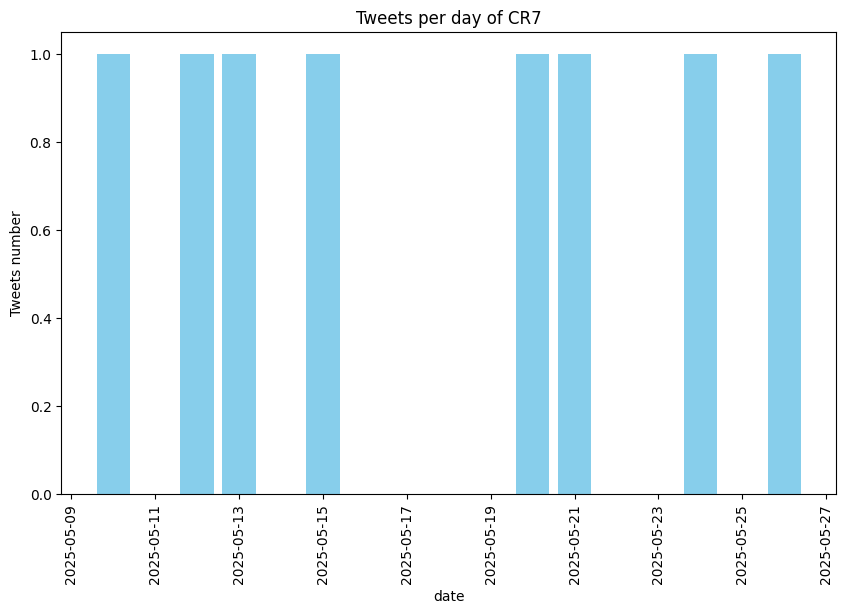

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(df_cr7_graph['date'], df_cr7_graph['tweet_count'], color = 'skyblue')
plt.title(f'Tweets per day of CR7')
plt.xlabel('date')
plt.ylabel('Tweets number')
#plt.grid(True)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

In [46]:
cr7_time_diff = df_cr7[['user', 'datetime']].copy()
cr7_time_diff.sort_values('datetime', inplace=True)
cr7_time_diff['time_diff'] = cr7_time_diff['datetime'].diff()
cr7_avg_time = cr7_time_diff['time_diff'].mean()
print(f"The Avg of each tweet is: {cr7_avg_time}")
print(f"AVG in minutes: {cr7_avg_time.total_seconds()/60:.2f}")

The Avg of each tweet is: 2 days 07:54:47.714285714
AVG in minutes: 3354.80


### Graph Davo and AVG

In [47]:
df_davo.head(20)

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376,2025-05-21,21:00:11
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6,2025-05-11,19:47:36
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135,2025-05-06,21:44:37
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32,2025-05-06,20:57:33
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66,2025-05-06,20:21:21
5,836969699665670145,No puedo creer lo que acaba de atajar Yann Som...,2025-05-06 20:17:08+00:00,es,373,157,30739,19,2025-05-06,20:17:08
6,836969699665670145,Es un excelente 1T del Inter. Muy bien parado ...,2025-05-06 19:52:45+00:00,es,162,261,12104,10,2025-05-06,19:52:45
7,836969699665670145,La última vez que disfruté tanto el partido de...,2025-04-30 19:49:58+00:00,es,3390,372,64484,63,2025-04-30,19:49:58
8,836969699665670145,Barcelona campeón de la Copa del Rey. Partido ...,2025-04-26 22:47:10+00:00,es,1315,368,36496,6,2025-04-26,22:47:10
9,836969699665670145,¿Qué sentido tiene simular un penal al último ...,2025-04-26 22:05:00+00:00,es,703,835,42381,58,2025-04-26,22:05:00


In [48]:
df_davo_gaph = df_davo.groupby(['date']).size().reset_index(name='tweets_count')
df_davo_gaph.head()

,date,tweets_count
0,2025-04-26,2
1,2025-04-30,1
2,2025-05-06,5
3,2025-05-11,1
4,2025-05-21,1


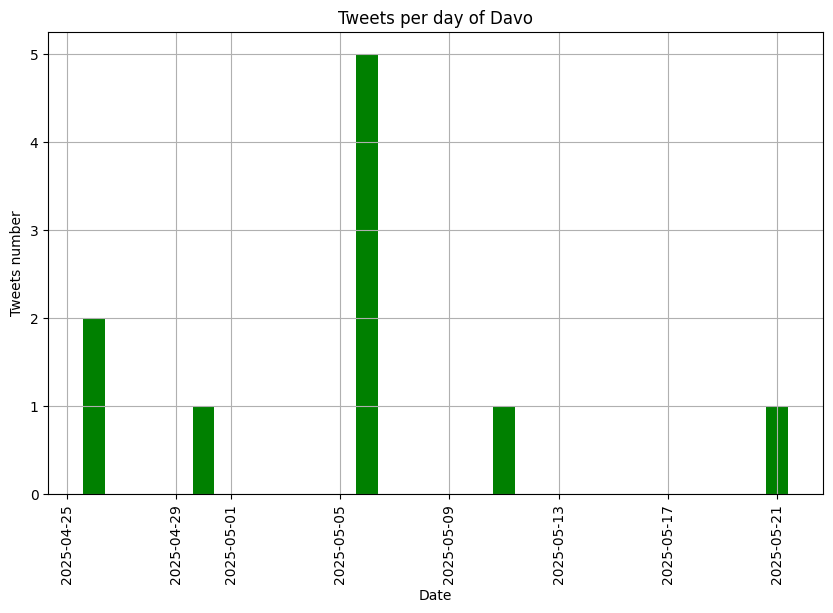

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(df_davo_gaph['date'], df_davo_gaph['tweets_count'], color='green')
plt.title(f'Tweets per day of Davo')
plt.xlabel('Date')
plt.ylabel('Tweets number')
plt.grid(True)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

In [50]:
# AVG of each tweet
davo_time_diff = df_davo[['user', 'datetime']].copy()
davo_time_diff.sort_values('datetime', inplace=True)
davo_time_diff['time_diff'] = davo_time_diff['datetime'].diff()
davo_avg_time = davo_time_diff['time_diff'].mean()
print(f"The Avg of each tweet is: {davo_avg_time}")
print(f"AVG in minutes: {davo_avg_time.total_seconds()/60:.2f}")


The Avg of each tweet is: 2 days 18:32:47.888888888
AVG in minutes: 3992.80


### Elon Graph and AVG

In [60]:
df_elon.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,44196397,How many real people are still on the Internet...,2025-05-27 06:02:12+00:00,en,478,1919,3833,84,2025-05-27,06:02:12
1,44196397,Kardashev 1 or you’re not even trying,2025-05-27 05:57:28+00:00,en,513,1190,4992,123,2025-05-27,05:57:28
2,44196397,Starship Pez Dispenser \n https://t.co/7yl0h1CXkn,2025-05-27 05:01:25+00:00,en,1569,1372,16188,117,2025-05-27,05:01:25
3,44196397,🥰 💫 https://t.co/KQdCCM32gs,2025-05-27 01:58:57+00:00,art,1926,2009,14467,121,2025-05-27,01:58:57
4,44196397,True https://t.co/UtyoHuynMn,2025-05-26 21:11:28+00:00,en,7666,2959,50507,153,2025-05-26,21:11:28


In [61]:
elon_graph = df_elon.groupby('date').size().reset_index(name='tweets_count')
elon_graph.head()

,date,tweets_count
0,2025-05-25,1
1,2025-05-26,5
2,2025-05-27,4


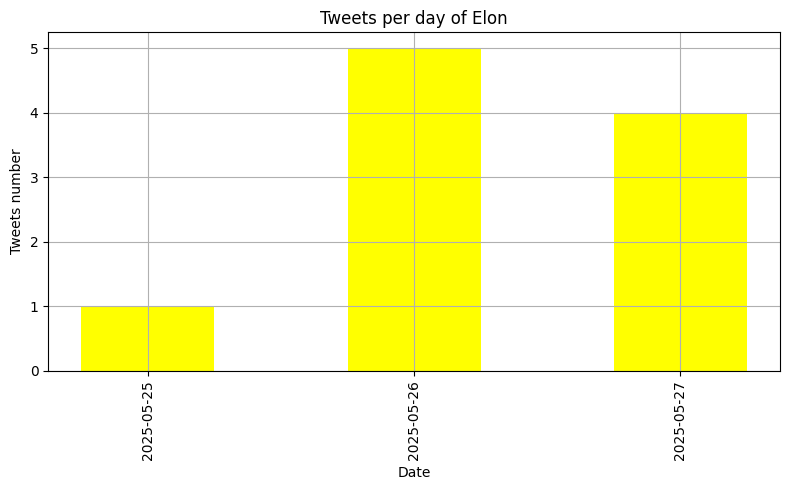

In [62]:
plt.figure(figsize=(8,5))
plt.bar(elon_graph['date'].astype(str), elon_graph['tweets_count'], color= 'yellow', width=0.5)
plt.title(f'Tweets per day of Elon')
plt.xlabel('Date')
plt.ylabel('Tweets number')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [63]:
# AVG of each tweet
elon_time_diff = df_elon[['user', 'datetime']].copy()
elon_time_diff.sort_values('datetime', inplace=True)
elon_time_diff['time_diff'] = elon_time_diff['datetime'].diff()
elon_avg_time = elon_time_diff['time_diff'].mean()
print(f"The Avg of each tweet is: {elon_avg_time}")
print(f"AVG in minutes: {elon_avg_time.total_seconds()/60:.2f}")

The Avg of each tweet is: 0 days 03:25:56.888888888
AVG in minutes: 205.95


### Fabrizio Graph and AVG

In [64]:
df_fabrizio.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,330262748,🚨 Maresca: “The problem is that the press thin...,2025-05-16 22:15:45+00:00,en,573,379,10530,95,2025-05-16,22:15:45
1,330262748,🔵🇪🇸 Five Premier League goals for Marc Cucurel...,2025-05-16 22:03:29+00:00,en,1146,260,16168,71,2025-05-16,22:03:29
2,330262748,🔵⚡️ Chelsea never considered Reece James exit ...,2025-05-16 21:49:41+00:00,en,1757,362,23612,94,2025-05-16,21:49:41
3,330262748,🚨📈 Crucial win for Chelsea! https://t.co/Fe26M...,2025-05-16 21:15:45+00:00,en,2290,582,37712,100,2025-05-16,21:15:45
4,330262748,"🚨🇦🇷 Dibu Martínez, emotional at FT as this cou...",2025-05-16 21:02:11+00:00,en,1011,362,19113,276,2025-05-16,21:02:11


In [65]:
fabri_graph = df_fabrizio.groupby('date').size().reset_index(name='tweets_count')
fabri_graph.head()

,date,tweets_count
0,2025-05-16,10


* Observation
    - In this case, this user tweets a lot in one day, and the extraction limit of 20 tweets prevents us form analyzing more deeply.
We will only get the avg time of each tweet

In [66]:
fabri_time_diff = df_fabrizio[['user', 'datetime']].copy()
fabri_time_diff.sort_values('datetime', inplace=True)
fabri_time_diff['time_diff'] = fabri_time_diff['datetime'].diff()
fabri_avg_time = fabri_time_diff['time_diff'].mean()
print(f"The Avg of each tweet is: {fabri_avg_time}")
print(f"AVG in minutes: {fabri_avg_time.total_seconds()/60:.2f}")

The Avg of each tweet is: 0 days 00:36:55.111111111
AVG in minutes: 36.92


### La cobra Graph and AVG

In [67]:
df_cobra.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376,2025-05-21,21:00:11
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6,2025-05-11,19:47:36
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135,2025-05-06,21:44:37
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32,2025-05-06,20:57:33
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66,2025-05-06,20:21:21


In [68]:
cobra_graph = df_cobra.groupby('date').size().reset_index(name='tweets_count')
cobra_graph.head()

,date,tweets_count
0,2025-04-26,2
1,2025-04-30,1
2,2025-05-06,5
3,2025-05-11,1
4,2025-05-14,1


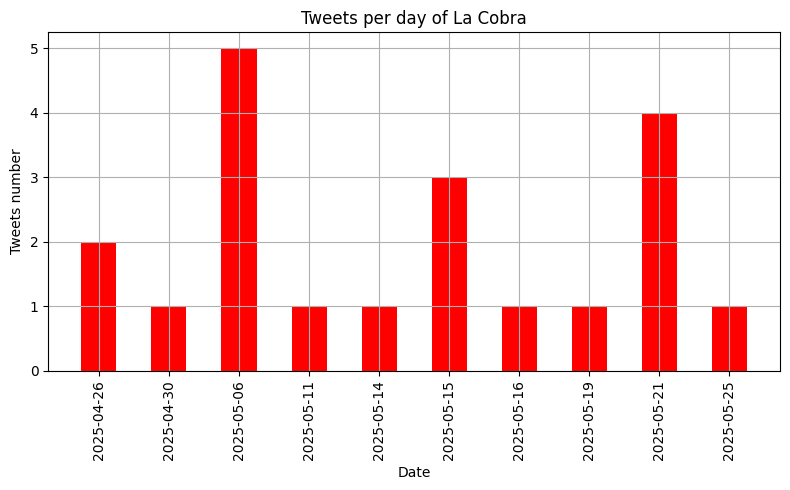

In [69]:
plt.figure(figsize=(8,5))
plt.bar(cobra_graph['date'].astype(str), cobra_graph['tweets_count'], color= 'red', width=0.5)
plt.title(f'Tweets per day of La Cobra')
plt.xlabel('Date')
plt.ylabel('Tweets number')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [70]:
cobra_time_diff = df_cobra[['user', 'datetime']].copy()
cobra_time_diff.sort_values('datetime', inplace=True)
cobra_time_diff['time_diff'] = cobra_time_diff['datetime'].diff()
cobra_avg_time = cobra_time_diff['time_diff'].mean()
print(f"The Avg of each tweet is: {cobra_avg_time}")
print(f"AVG in minutes: {cobra_avg_time.total_seconds()/60:.2f}")

The Avg of each tweet is: 1 days 11:37:05.210526315
AVG in minutes: 2137.09


### Graph Overlap and AVG

In [71]:
df_overlap.head()

,user,text,datetime,language,retweet_count,reply_count,like_count,quote_count,date,time
0,836969699665670145,¿Qué deporte recomiendan empezar a ver? El fút...,2025-05-21 21:00:11+00:00,es,2722,2812,87397,376,2025-05-21,21:00:11
1,836969699665670145,Ah bueno el gol que acaba de hacer Santiago Mo...,2025-05-11 19:47:36+00:00,es,139,182,9946,6,2025-05-11,19:47:36
2,836969699665670145,"Gol en fase de grupos, octavos, cuartos y en s...",2025-05-06 21:44:37+00:00,es,2252,653,39737,135,2025-05-06,21:44:37
3,836969699665670145,Fútbol. No hace falta escribir nada más. Impre...,2025-05-06 20:57:33+00:00,es,3057,346,47741,32,2025-05-06,20:57:33
4,836969699665670145,La mejor semifinal de Champions League de los ...,2025-05-06 20:21:21+00:00,es,2518,344,51874,66,2025-05-06,20:21:21


In [72]:
overlap_graph = df_overlap.groupby('date').size().reset_index(name='tweets_count')
overlap_graph.head()

,date,tweets_count
0,2025-04-26,2
1,2025-04-30,1
2,2025-05-06,5
3,2025-05-10,1
4,2025-05-11,1


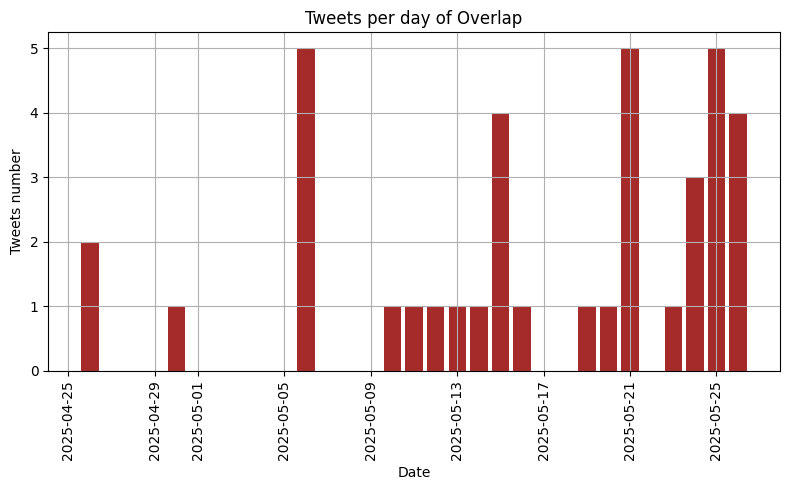

In [73]:
plt.figure(figsize=(8,5))
plt.bar(overlap_graph['date'], overlap_graph['tweets_count'], color='brown')
plt.title(f'Tweets per day of Overlap')
plt.xlabel('Date')
plt.ylabel('Tweets number')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [74]:
overlap_time_diff = df_overlap[['user', 'datetime']].copy()
overlap_time_diff.sort_values('datetime', inplace=True)
overlap_time_diff['time_diff'] = overlap_time_diff['datetime'].diff()
overlap_avg_time = overlap_time_diff['time_diff'].mean()
print(f"The Avg of each tweet is: {overlap_avg_time}")
print(f"AVG in minutes: {overlap_avg_time.total_seconds()/60:.2f}")

The Avg of each tweet is: 0 days 19:25:07.432432432
AVG in minutes: 1165.12


## Save the whole dataframe in PostgrestSQL

In [ ]:
#Conection with own Database
username = 'username'
password = 'password'
host = 'host'
port = 'port'
database = 'database'

In [433]:
#create the engine of SQLAlchemy
engine = sa.create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

In [434]:
#Create a connection with our Db
conn = engine.connect()

In [435]:
with engine.begin() as conn:
    conn.execute(text("""
        CREATE TABLE IF NOT EXISTS accounts (
            user_id BIGINT,
            text VARCHAR(1500),
            datetime TIMESTAMP,
            language VARCHAR(5),
            retweet_count BIGINT,
            reply_count BIGINT,
            like_count BIGINT,
            quote_count BIGINT,
            date VARCHAR(11),
            time VARCHAR(10),
            name VARCHAR(10)
        )
    """))

In [437]:
#Importing the information of our dataframe to our database
df.to_sql("accounts", engine, if_exists="append", index=False)

96

In [438]:
#We close the connection
conn.close()